In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import nltk
import warnings
%matplotlib inline

warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv(r'https://raw.githubusercontent.com/aswintechguy/Machine-Learning-Projects/master/Twitter%20Sentiment%20Analysis%20-%20NLP/Twitter%20Sentiments.csv')

In [4]:
data.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [5]:
data.isna().any()

id       False
label    False
tweet    False
dtype: bool

In [8]:
data.tail()

,id,label,tweet
31957,31958,0,ate @user isz that youuu?ðððððð...
31958,31959,0,to see nina turner on the airwaves trying to...
31959,31960,0,listening to sad songs on a monday morning otw...
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,..."
31961,31962,0,thank you @user for you follow


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


In [10]:
data.shape

(31962, 3)

In [11]:
#removing @ users

In [12]:
#removes patterns in input text
def remove_pattern(input_text,pattern):
    r=re.findall(pattern,input_text)
    for word in r:
        input_text=re.sub(word,"",input_text)
    return input_text

In [14]:
#remove twitter handles (@user)

In [15]:
data['clean_tweet'] = np.vectorize(remove_pattern)(data['tweet'],"@[\w]*")

In [16]:
data.head()

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause th...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation,factsguide: society now #motivation


In [18]:
#remove some special characters,numbers and punctuations

In [19]:
data['clean_tweet'] = data['clean_tweet'].str.replace("[^a-zA-Z#]"," ")
data.head()

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can t use cause th...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation,factsguide society now #motivation


In [20]:
#removing shorter words

In [21]:
data['clean_tweet'] = data['clean_tweet'].apply(lambda x: " ".join([w for w in x.split() if len(w)>3]))

In [22]:
data.head()

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when father dysfunctional selfish drags kids i...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks #lyft credit cause they offer wheelchai...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model love take with time
4,5,0,factsguide: society now #motivation,factsguide society #motivation


In [23]:
#tokenize

In [24]:
from nltk import word_tokenize

In [27]:
tokenized_tweet = data['clean_tweet'].apply(lambda x: x.split())
tokenized_tweet.head()

0    [when, father, dysfunctional, selfish, drags, ...
1    [thanks, #lyft, credit, cause, they, offer, wh...
2                              [bihday, your, majesty]
3                     [#model, love, take, with, time]
4                   [factsguide, society, #motivation]
Name: clean_tweet, dtype: object

In [28]:
#stemming

In [29]:
from nltk.stem.porter import PorterStemmer

In [30]:
stemmer = PorterStemmer()

In [32]:
tokenized_tweet = tokenized_tweet.apply(lambda sentence: [stemmer.stem(word) for word in sentence ])

In [33]:
tokenized_tweet.head()

0    [when, father, dysfunct, selfish, drag, kid, i...
1    [thank, #lyft, credit, caus, they, offer, whee...
2                              [bihday, your, majesti]
3                     [#model, love, take, with, time]
4                         [factsguid, societi, #motiv]
Name: clean_tweet, dtype: object

In [34]:
 #combine words into sentence

In [35]:
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = " ".join(tokenized_tweet[i])

data['clean_tweet'] = tokenized_tweet

In [36]:
data.head()

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when father dysfunct selfish drag kid into dys...
1,2,0,@user @user thanks for #lyft credit i can't us...,thank #lyft credit caus they offer wheelchair ...
2,3,0,bihday your majesty,bihday your majesti
3,4,0,#model i love u take with u all the time in ...,#model love take with time
4,5,0,factsguide: society now #motivation,factsguid societi #motiv


# Exploratory data anlysis

In [37]:
# DISPLAY FREQUENT WORDS

In [38]:
all_words= " ".join([sentence for sentence in data['clean_tweet']])

In [39]:
all_words

'when father dysfunct selfish drag kid into dysfunct #run thank #lyft credit caus they offer wheelchair van #disapoint #getthank bihday your majesti #model love take with time factsguid societi #motiv huge fare talk befor they leav chao disput when they there #allshowandnogo camp tomorrow danni next school year year exam think about that #school #exam #hate #imagin #actorslif #revolutionschool #girl love land #allin #cav #champion #cleveland #clevelandcavali welcom here #ireland consum price index climb from previou #blog #silver #gold #forex selfish #orlando #standwithorlando #pulseshoot #orlandoshoot #biggerproblem #selfish #heabreak #valu #love daddi today day #gettingf #cnn call #michigan middl school build wall chant #tcot comment #australia #opkillingbay #seashepherd #helpcovedolphin #thecov #helpcovedolphin ouch junior angri #got #junior #yugyoem #omg thank have paner #thank #posit retweet agre #friday smile around user #cooki make peopl know essenti oil made chemic #euro peopl 

In [43]:
from wordcloud import WordCloud

ModuleNotFoundError: No module named 'wordcloud'

In [44]:
!pip install wordcloud

In [45]:
from wordcloud import WordCloud

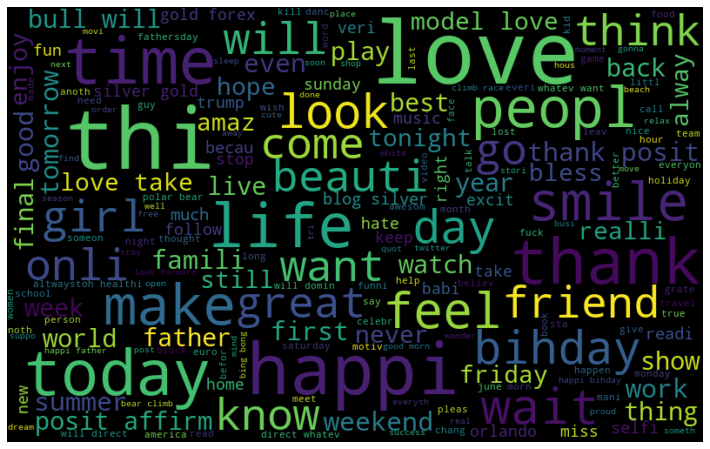

In [51]:
wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [54]:
#frequency words visualization

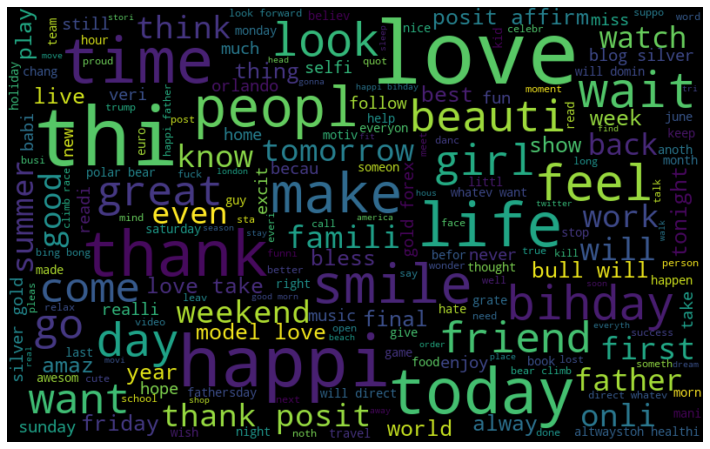

In [57]:
all_words= " ".join([sentence for sentence in data['clean_tweet'][data['label']==0]])
wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [58]:
all_words = " ".join([sentence for sentence in data['clean_tweet'][data['label']==1]])

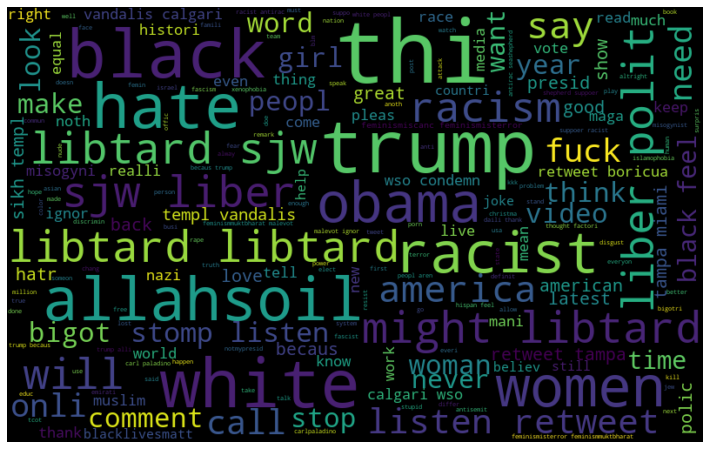

In [60]:

wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [61]:
#function to extract hash tag

In [77]:
def hashtag_extract(tweets):
    hashtags=[]
    for tweet in tweets:
        ht = re.findall(r'#(\w+)',tweet)
        hashtags.append(ht)
    return hashtags

In [63]:
#extract hashtags from non racist/sexist/tweets

In [78]:
ht_positive = hashtag_extract(data['clean_tweet'][data['label']==0])

In [79]:
ht_negative = hashtag_extract(data['clean_tweet'][data['label']==1])

In [80]:
#combine into single list
ht_positive[:5]

[['run'], ['lyft', 'disapoint', 'getthank'], [], ['model'], ['motiv']]

In [81]:
ht_positive = sum(ht_positive, [])
ht_negative = sum(ht_negative, [])

In [82]:
ht_positive[:5]

['run', 'lyft', 'disapoint', 'getthank', 'model']

In [86]:
#determines how many times a word repeated
freq = nltk.FreqDist(ht_positive)

In [87]:
d = pd.DataFrame({'Hashtag': list(freq.keys()),
                 'Count':list(freq.values())})

In [88]:
d

,Hashtag,Count
0,run,72
1,lyft,2
2,disapoint,1
3,getthank,2
4,model,375
...,...,...
19490,kamp,1
19491,ucsd,1
19492,berlincitygirl,1
19493,genf,1


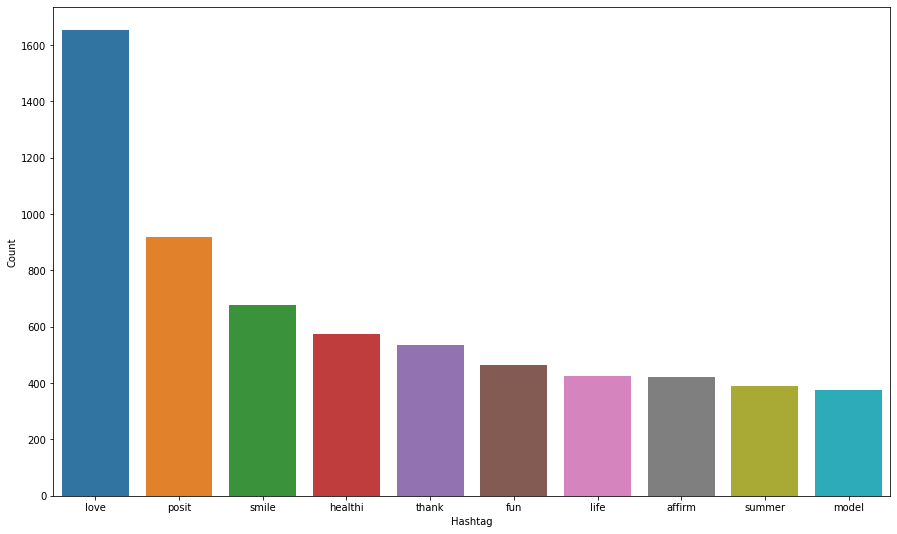

In [89]:
d = d.nlargest(columns='Count',n=10)
plt.figure(figsize=(15,9))
sns.barplot(data = d,x='Hashtag',y='Count')
plt.show()

In [93]:
freq = nltk.FreqDist(ht_negative)

In [96]:
d = pd.DataFrame({'Hashtag':freq.keys(),
                 'Count':freq.values()})


In [97]:
d

,Hashtag,Count
0,cnn,10
1,michigan,2
2,tcot,14
3,australia,6
4,opkillingbay,5
...,...,...
1714,jumpedtheshark,1
1715,freemilo,5
1716,milo,4
1717,mailboxprid,1


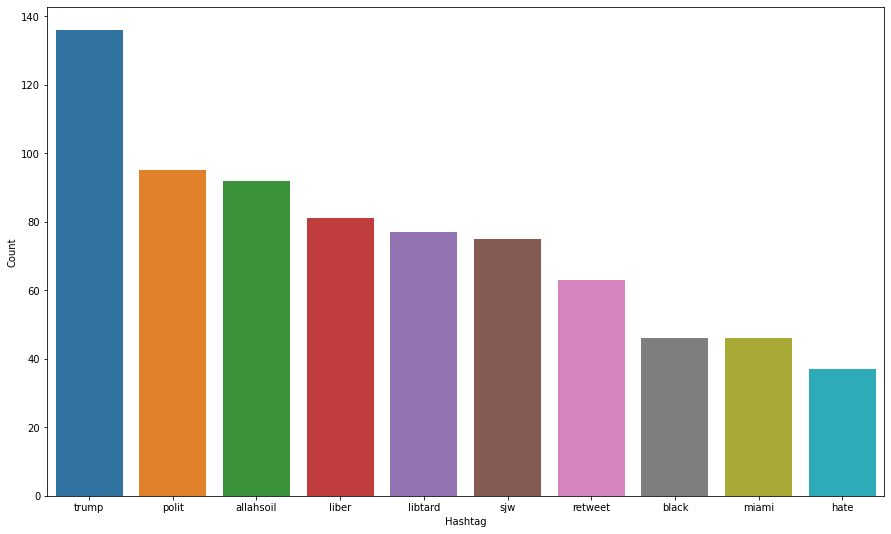

In [102]:
d = d.nlargest(columns='Count', n=10)
plt.figure(figsize=(15,9))
sns.barplot(data=d, x='Hashtag', y='Count')
plt.show()

In [104]:
#convert these words to vectors or bag of words

In [105]:
from sklearn.feature_extraction.text import CountVectorizer

In [106]:
#Cvectizer generates the bag of words [matrix with no of occurances of words]

In [107]:
bow_vectorizer = CountVectorizer(max_df=0.90,min_df=2,max_features=1000,stop_words='english')
bow = bow_vectorizer.fit_transform(data['clean_tweet'])

In [112]:
bow[0].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [113]:
from sklearn.model_selection import train_test_split as tts

In [114]:
x_train,x_test,y_train,y_test = tts(bow,data['label'],random_state=42,test_size=0.25)

In [116]:
x_train.shape

(23971, 1000)

In [117]:
from sklearn.linear_model import LogisticRegression

In [118]:
lr = LogisticRegression()

In [119]:
lr.fit(x_train,y_train)

LogisticRegression()

In [120]:
y_pred = lr.predict(x_test)

In [121]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [122]:
y_test

12227    0
14709    0
19319    0
4308     0
24055    0
        ..
21818    0
7363     0
26986    0
7698     0
30232    0
Name: label, Length: 7991, dtype: int64

In [123]:
from sklearn.metrics import f1_score

In [124]:
print(f1_score(y_pred,y_test))

0.49763033175355453


In [125]:
from sklearn.metrics import accuracy_score

In [126]:
print(accuracy_score(y_test,y_pred))

0.9469403078463271
